# Credit Scoring

Loan dataset 2007-2014 Virtual Internship ID/X Partners - Rakamin

### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import ignore warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ID X Partners - Rakamin Virtual Internship/loan_data_2007_2014.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

catatan:

banyak missing value pada feature

cek persentasinya dibawah

In [ ]:
(df.isna().mean()*100).sort_values(ascending=False).head(25)

inq_last_12m                   100.000000
total_bal_il                   100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
annual_inc_joint               100.000000
open_acc_6m                    100.000000
open_il_6m                     100.000000
open_il_12m                    100.000000
open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
il_util                        100.000000
open_rv_24m                    100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_rv_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
tot_coll_amt                    15

catatan:

banyak missing value mendekati >40% atau lebih

In [ ]:
missing_values = df.isna().mean()*100
col_missingvalues = missing_values[missing_values > 40].index
col_missingvalues

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

catatan:

data dengan missing value >40% akan didrop

In [ ]:
df.drop(col_missingvalues, axis = 1, inplace = True)

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1) #drop column index doubel

Cek data duplikat

In [ ]:
print('id',df['id'].nunique())
print('member id',df['member_id'].nunique())

id 466285
member id 466285


catatan:

data duplikat tidak ditemukan

hapus data tidak relevan

In [ ]:
col = ['id','member_id','url','sub_grade','zip_code']
df.drop(col, axis=1, inplace= True)

### Identifikasi Variable Target

In [ ]:
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [ ]:
bad_loan = ['Charged Off', 'Default' , 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['bad_loan'] = np.where(df['loan_status'].isin(bad_loan), 1, 0)

# Drop kolom 'loan_status'
df.drop(columns = ['loan_status'], inplace = True)

In [ ]:
df['bad_loan'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_loan, dtype: float64

### Data Cleaning

In [ ]:
df.iloc[:,0:16].head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,bike
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,real estate business


In [ ]:
df.iloc[:,16:32].head(3)

,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00
1,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46
2,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00


In [ ]:
df.iloc[:,32:48].head(3)

,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,603.65,0.0,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0


**term**

tenor pinjaman (36 / 60 bulan)

In [ ]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(float)

**emp_length**

lama kerja peminjam dalam 1 tahun

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

ubah labelnya menjadi numerik

In [ ]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

df['emp_length_int'] = df['emp_length_int'].astype(float)
df.drop('emp_length', axis=1, inplace=True)

<ipython-input-19-31839ff9c1c9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


**issue_d**

bulan saat pinjaman cair

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# selisih terhitung hingga Juli 2022
df['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df['issue_d']) / np.timedelta64(1, 'M')))

cek nilai negatif dalam jumlah selisih bulan

In [ ]:
any(df['months_since_issue_d']<0)

False

hapus variable awal (format tanggal)

In [ ]:
df.drop('issue_d', axis=1, inplace=True)

**earliest_cr_line**

bulan batas kredit paling awal dilaporkan peminjam

In [ ]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

# selisih terhitung hingga Juli 2022
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))

cek nilai negatif dalam jumlah selisih bulan

In [ ]:
any(df['months_since_earliest_cr_line']<0)

True

In [ ]:
df.loc[df['months_since_earliest_cr_line']<0, 'months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'].max()

hapus variable awal (format tanggal)

In [ ]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

**last_pymnt_d**

bulan terakhir pembayaran diterima

In [ ]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

# selisih terhitung hingga Juli 2022
df['months_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
     

cek nilai negatif dalam jumlah selisih bulan

In [ ]:
any(df['months_since_last_pymnt_d']<0)

False

hapus variable awal (format tanggal)

In [ ]:
df.drop('last_pymnt_d', axis=1, inplace=True)

**last_credit_pull_d**

bulan terakhir penarikan pinjaman kredit

In [ ]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

# selisih terhitung hingga Juli 2022
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))

memeriksa nilai negatif dalam jumlah selisih bulan

In [ ]:
any(df['months_since_last_credit_pull_d']<0)

False

hapus variabel awal (format tanggal)

In [ ]:
df.drop('last_credit_pull_d', axis=1, inplace=True)

###label checking

data dibagi menjadi numrik dan kategorik

In [ ]:
numerik = df.select_dtypes(exclude='object')
kategorik = df.select_dtypes(include='object')

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan,emp_length_int,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
0,5000,5000,4975.0,36.0,10.65,162.87,B,NaN,RENT,24000.0,...,0.0,NaN,NaN,NaN,0,10.0,127.0,450.0,90.0,78.0
1,2500,2500,2500.0,60.0,15.27,59.83,C,Ryder,RENT,30000.0,...,0.0,NaN,NaN,NaN,1,0.0,127.0,279.0,111.0,106.0
2,2400,2400,2400.0,36.0,15.96,84.33,C,NaN,RENT,12252.0,...,0.0,NaN,NaN,NaN,0,10.0,127.0,248.0,97.0,78.0
3,10000,10000,10000.0,36.0,13.49,339.31,C,AIR RESOURCES BOARD,RENT,49200.0,...,0.0,NaN,NaN,NaN,0,10.0,127.0,317.0,90.0,90.0
4,3000,3000,3000.0,60.0,12.69,67.79,B,University Medical Group,RENT,80000.0,...,0.0,NaN,NaN,NaN,0,1.0,127.0,318.0,78.0,78.0


In [ ]:

col_kat = kategorik.columns
col_num = numerik.columns

for i in col_kat:
  data = df[i]
  print('nunique variabel {} sebanyak {}'.format(i, data.nunique()))

print('')

for j in col_num:
  data = df[j]
  print('nunique variabel {} sebanyak {}'.format(j, data.nunique()))

nunique variabel grade sebanyak 7
nunique variabel emp_title sebanyak 205475
nunique variabel home_ownership sebanyak 6
nunique variabel verification_status sebanyak 3
nunique variabel pymnt_plan sebanyak 2
nunique variabel purpose sebanyak 14
nunique variabel title sebanyak 63099
nunique variabel addr_state sebanyak 50
nunique variabel initial_list_status sebanyak 2
nunique variabel application_type sebanyak 1

nunique variabel loan_amnt sebanyak 1352
nunique variabel funded_amnt sebanyak 1354
nunique variabel funded_amnt_inv sebanyak 9854
nunique variabel term sebanyak 2
nunique variabel int_rate sebanyak 506
nunique variabel installment sebanyak 55622
nunique variabel annual_inc sebanyak 31901
nunique variabel dti sebanyak 3997
nunique variabel delinq_2yrs sebanyak 24
nunique variabel inq_last_6mths sebanyak 28
nunique variabel open_acc sebanyak 62
nunique variabel pub_rec sebanyak 26
nunique variabel revol_bal sebanyak 58142
nunique variabel revol_util sebanyak 1269
nunique variabe

In [ ]:
col_kat = kategorik.columns

for i in col_kat:
  data = df[i]
  print('distribusi label variabel {} antara lain: \n{}'.format(i,data.value_counts()))
  print('')

distribusi label variabel grade antara lain: 
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

distribusi label variabel emp_title antara lain: 
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64

distribusi label variabel home_ownership antara lain: 
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

distribusi label variabel verification_status antara lain: 
Verified           



*   terdapat variabel yang hanya memiliki 1 nilai dan akan dihapus
*   terdapat label imbalance dan akan dihapus    
*   terdapat variabel kategorik yang memiliki nilai hingga puluhan ribu dan akan dihapus





In [ ]:
df.drop(['policy_code', 'application_type', 'emp_title', 'title', 'pymnt_plan'],axis = 1, inplace= True)

###Handling Missing Value

In [ ]:
numerik = df.select_dtypes(exclude='object')
missing_numerik = numerik.isna().mean()*100
col_mis_num = missing_numerik[missing_numerik > 0].index
print(len(col_mis_num))

kategorik = df.select_dtypes(include='object')
missing_kategorik = kategorik.isna().mean()*100
col_mis_kat = missing_kategorik[missing_kategorik > 0].index
print(len(col_mis_kat))
     

16
0


cek distribusi sebelum imputasi data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

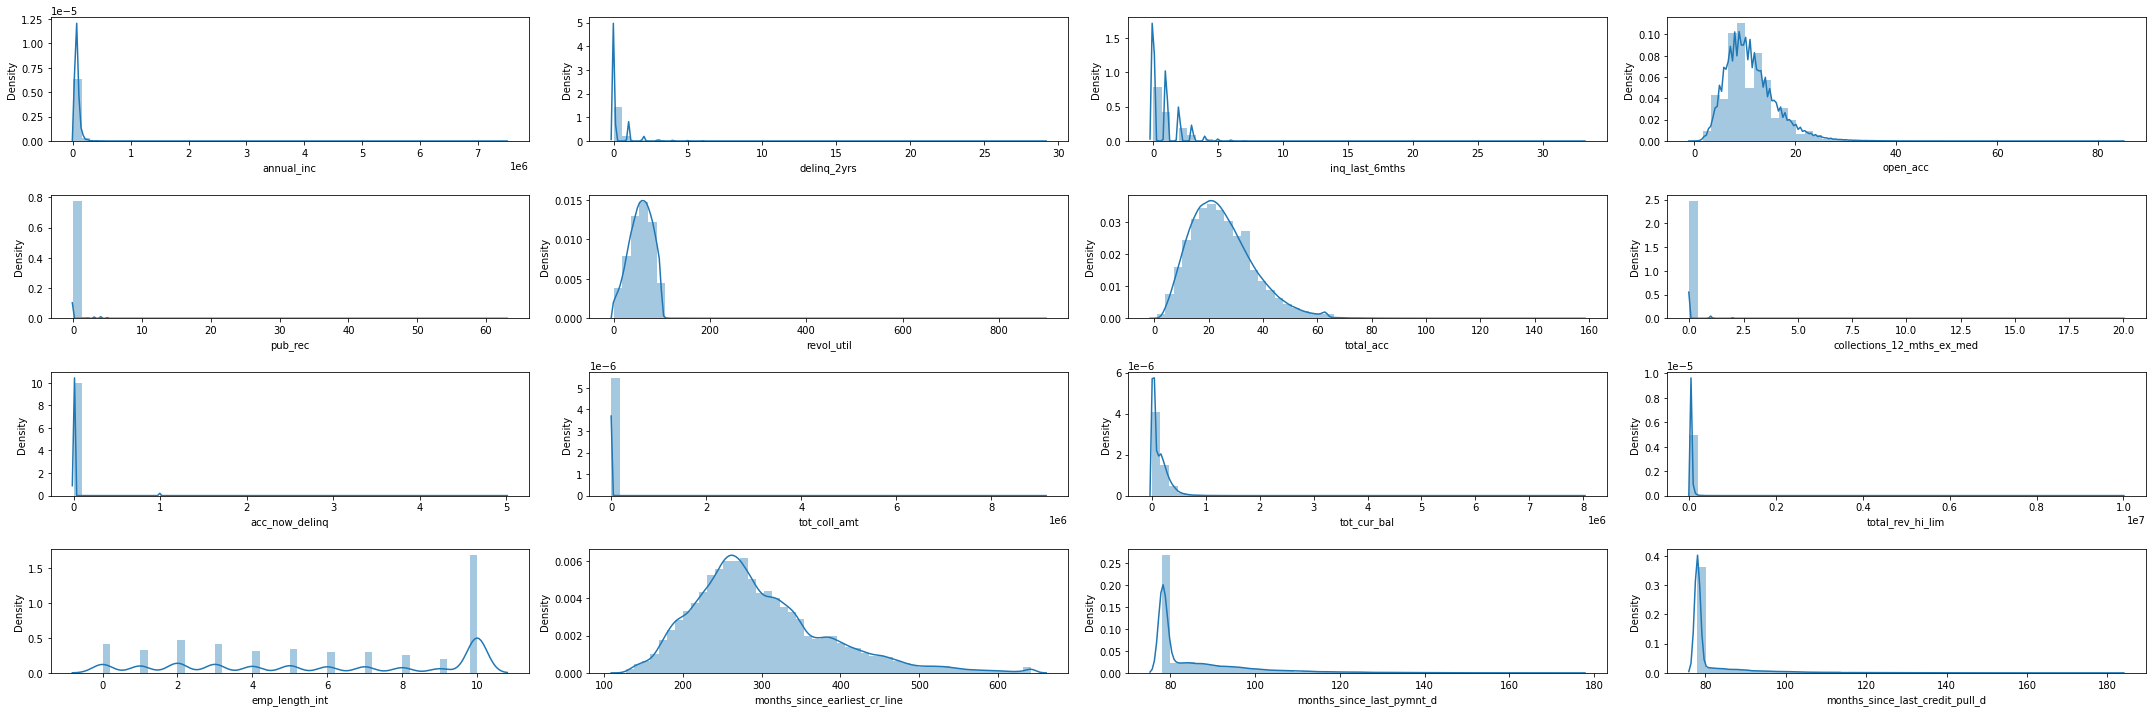

In [ ]:
plt.figure(figsize=(30,10))
for i,j in enumerate(col_mis_num):
  plt.subplot(4,4,i+1)
  sns.distplot(numerik[j])
  plt.tight_layout()
     

In [ ]:
treat_bymedian =  ['open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_last_credit_pull_d']
treat_bymodus = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'emp_length_int', 'collections_12_mths_ex_med']

for i in treat_bymedian:
  df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()

for j in treat_bymodus:
  df.loc[df.loc[:,j].isnull(),j] = df.loc[:,j].mode()[0]

#cek ulang missing value
df.isna().mean()*100

loan_amnt                          0.0
funded_amnt                        0.0
funded_amnt_inv                    0.0
term                               0.0
int_rate                           0.0
installment                        0.0
grade                              0.0
home_ownership                     0.0
annual_inc                         0.0
verification_status                0.0
purpose                            0.0
addr_state                         0.0
dti                                0.0
delinq_2yrs                        0.0
inq_last_6mths                     0.0
open_acc                           0.0
pub_rec                            0.0
revol_bal                          0.0
revol_util                         0.0
total_acc                          0.0
initial_list_status                0.0
out_prncp                          0.0
out_prncp_inv                      0.0
total_pymnt                        0.0
total_pymnt_inv                    0.0
total_rec_prncp          

###Handling Outlier

In [ ]:
from scipy import stats

numerik = df.select_dtypes(exclude='object')
kategorik = df.select_dtypes(include='object')

numerik = numerik[(np.abs(stats.zscore(numerik)) < 3).all(axis=1)]
df = numerik.join(kategorik)
df.shape
     

(357178, 42)

cek ulang bobot value numerik

In [ ]:
numerik = df.select_dtypes(exclude='object')
for j in numerik.columns:
  data = df[j]
  print('nunique variabel {} sebanyak {}'.format(j, data.nunique()))
     

nunique variabel loan_amnt sebanyak 1269
nunique variabel funded_amnt sebanyak 1270
nunique variabel funded_amnt_inv sebanyak 3863
nunique variabel term sebanyak 2
nunique variabel int_rate sebanyak 322
nunique variabel installment sebanyak 46350
nunique variabel annual_inc sebanyak 25242
nunique variabel dti sebanyak 3996
nunique variabel delinq_2yrs sebanyak 3
nunique variabel inq_last_6mths sebanyak 5
nunique variabel open_acc sebanyak 27
nunique variabel pub_rec sebanyak 2
nunique variabel revol_bal sebanyak 46425
nunique variabel revol_util sebanyak 1186
nunique variabel total_acc sebanyak 58
nunique variabel out_prncp sebanyak 112381
nunique variabel out_prncp_inv sebanyak 116563
nunique variabel total_pymnt sebanyak 270882
nunique variabel total_pymnt_inv sebanyak 268043
nunique variabel total_rec_prncp sebanyak 135507
nunique variabel total_rec_int sebanyak 214757
nunique variabel total_rec_late_fee sebanyak 905
nunique variabel recoveries sebanyak 10138
nunique variabel collec

variabel yang hanya memiliki 1 nilai akan dihapus

In [ ]:
col_convert = ['term','pub_rec','delinq_2yrs','inq_last_6mths']

for i in col_convert:
  df[i] = df[i].astype(str)

df.drop(['collections_12_mths_ex_med', 'acc_now_delinq'], axis = 1, inplace =True)

### Exploratory Data Analysis

In [ ]:
df.loc[df['bad_loan']==0,'status']='Lunas'
df.loc[df['bad_loan']==1,'status']='Gagal Bayar'

numerik = df.select_dtypes(exclude='object')
kategorik = df.select_dtypes(include='object')
     

plot distribusi

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

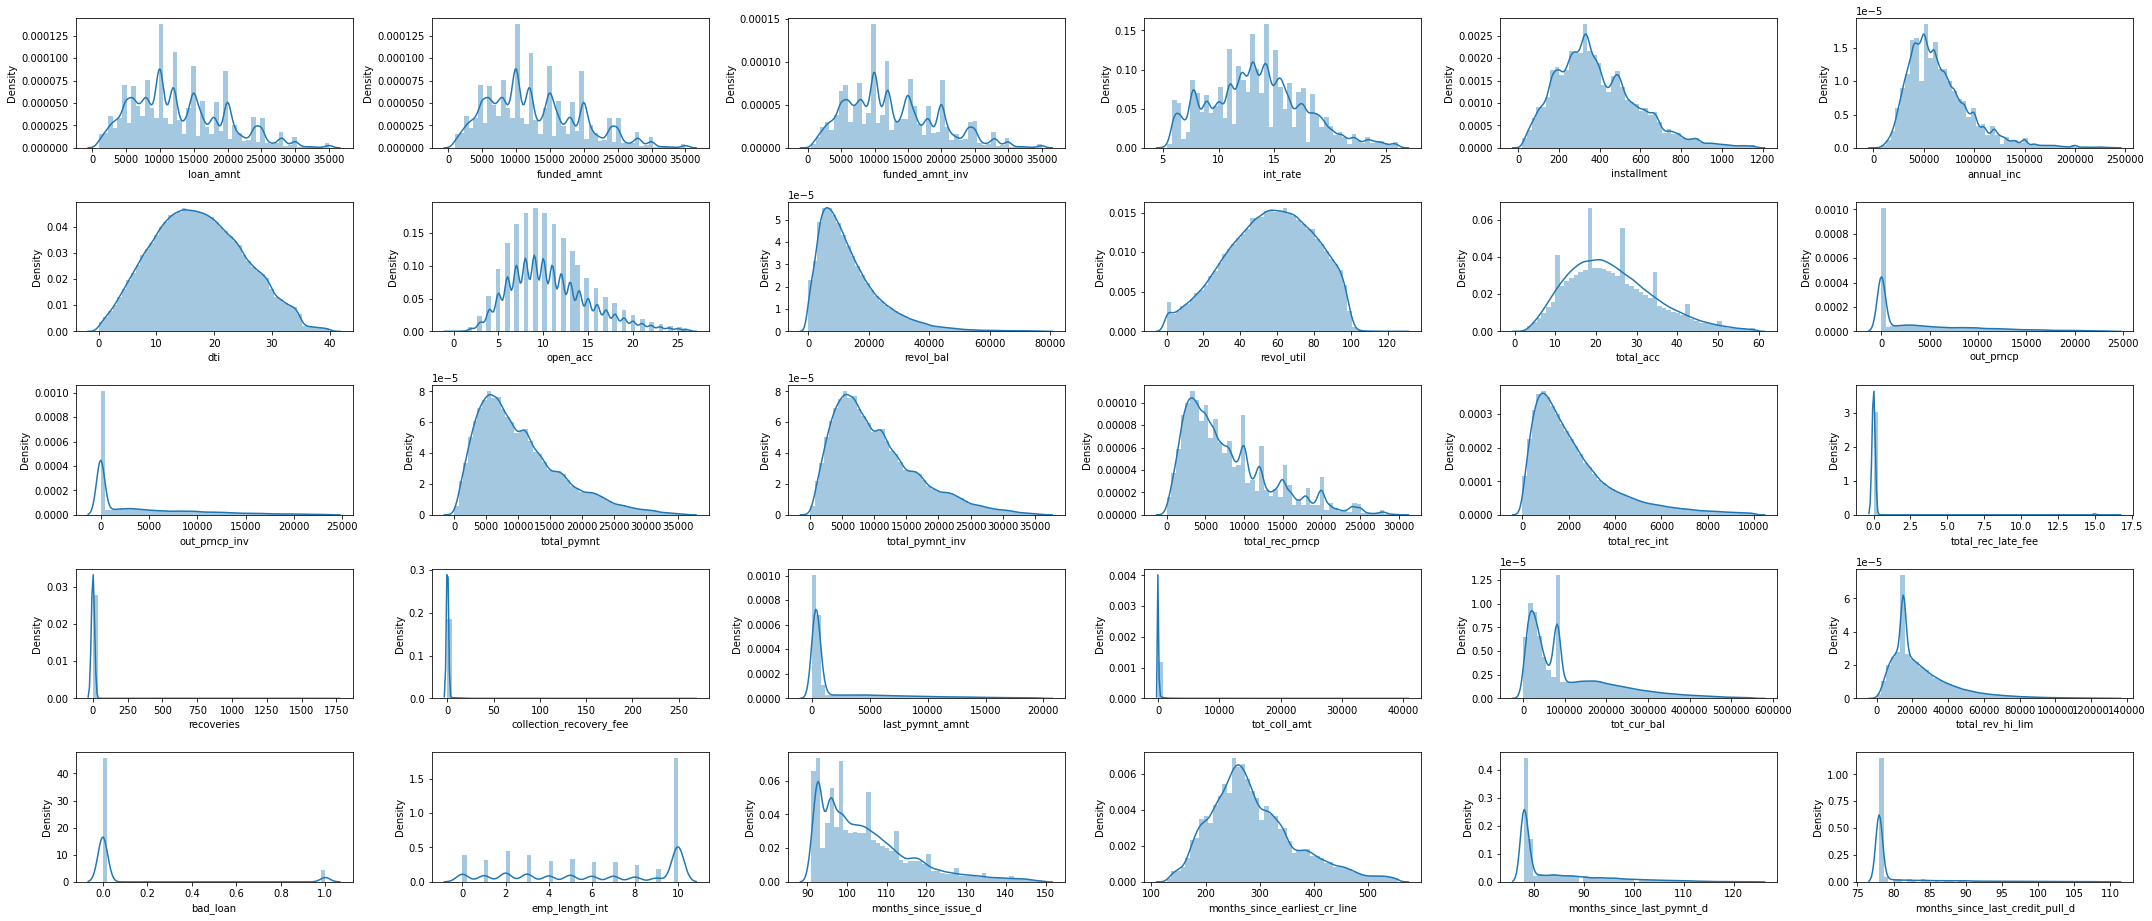

In [ ]:
col = numerik.columns

plt.figure(figsize=(30,15))
for i in range(0,len(col)):
  plt.subplot(6,6,i+1)
  sns.distplot(numerik[numerik.columns[i]])
  plt.tight_layout()

In [ ]:
numerik.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,357178.0,12788.798232,6783.512118,1000.00,7600.0000,12000.000,17500.0000,35000.0000
funded_amnt,357178.0,12771.271327,6769.702473,1000.00,7575.0000,12000.000,17475.0000,35000.0000
funded_amnt_inv,357178.0,12757.886693,6764.234083,500.00,7550.0000,11975.000,17450.0000,35000.0000
int_rate,357178.0,13.469328,4.194683,5.42,10.4900,13.350,16.2000,26.0600
installment,357178.0,389.494158,199.823028,19.87,245.5100,354.315,505.3400,1162.4300
annual_inc,357178.0,65562.178160,31995.894778,3000.00,43000.0000,60000.000,80000.0000,238000.0000
dti,357178.0,17.383684,7.831606,0.00,11.5200,17.010,22.9500,39.9900
open_acc,357178.0,10.788920,4.463947,0.00,8.0000,10.000,13.0000,26.0000
revol_bal,357178.0,13852.593127,10723.989953,0.00,6291.0000,11121.000,18417.0000,78213.0000
revol_util,357178.0,56.348031,23.225216,0.00,39.8000,57.600,74.4000,125.8000


catatan:

terdapat variabel dengan nilai Q1,Q2,Q3 = 0 memicu model dengan high bias atau bias tinggi maka akan dikonversi ke tipe kategori

In [ ]:
df['total_rec_late_fee_label'] = np.where(df['total_rec_late_fee']==0, 'None', 'Paid')
df['collection_recovery_fee_label'] = np.where(df['collection_recovery_fee']==0, 'None', 'Paid')
df['tot_coll_amt_label'] = np.where(df['tot_coll_amt']==0, 'None', 'Paid')
df['recoveries_label'] = np.where(df['recoveries']==0, 'None', 'Paid')

In [ ]:
df.drop(['total_rec_late_fee','recoveries','collection_recovery_fee','tot_coll_amt'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

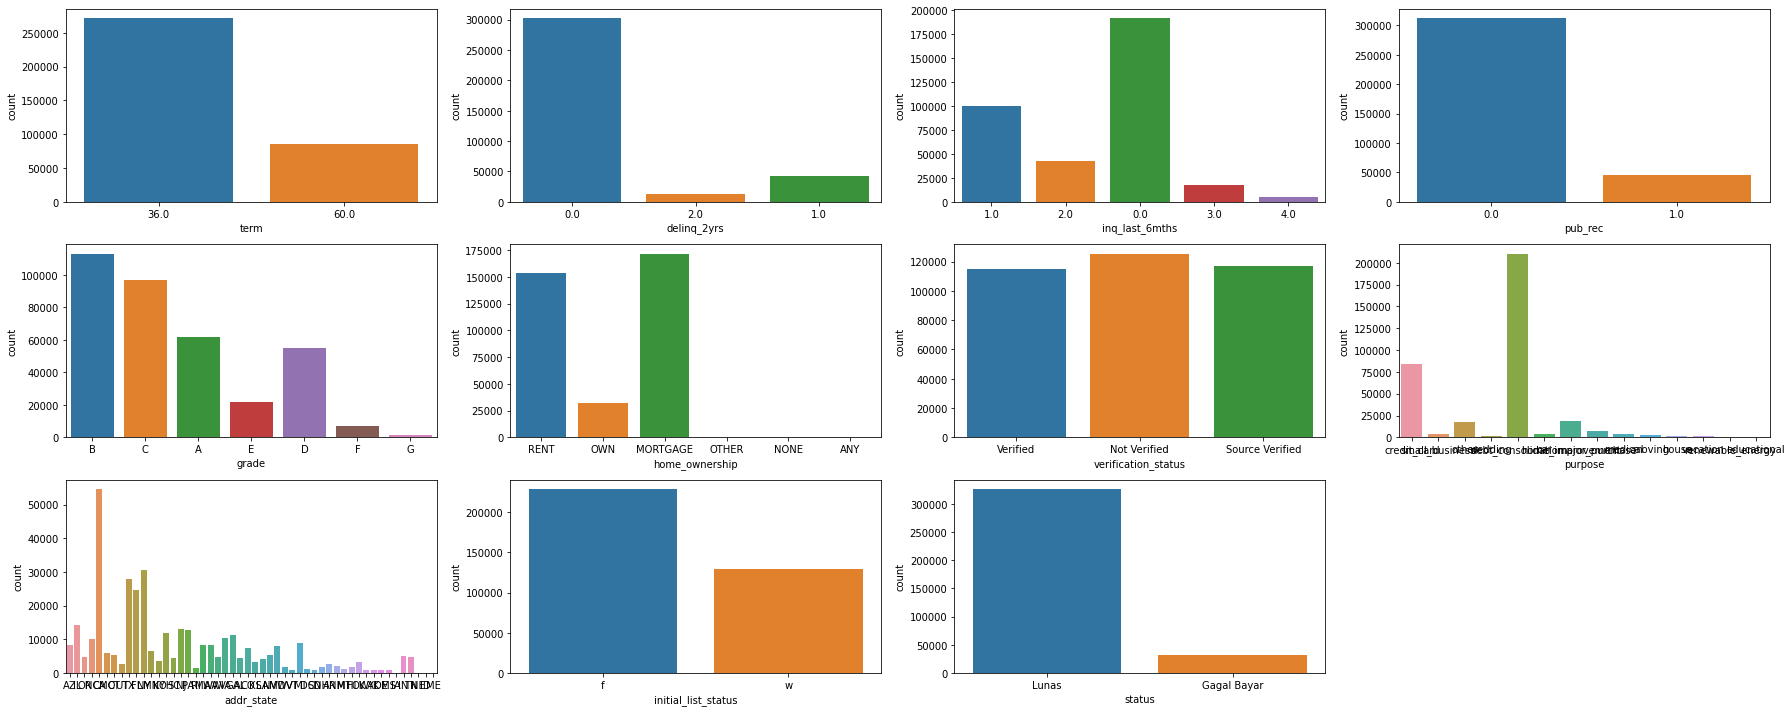

In [ ]:
col = kategorik.columns

plt.figure(figsize=(25,10))
for i in range(0,len(col)):
  plt.subplot(3,4,i+1)
  sns.countplot(kategorik[kategorik.columns[i]])
  plt.tight_layout()

catatan:

* terdapat variabel prediktor dengan label tidak imbalance dan akan mempengaruhi akurasi model maka akan dikelompokkan kembali dalam beberapa label.
* terdapat variabel target dengan pola yang imbalance maka akan diatasi pada tahap preprocessing

In [ ]:
df['home_ownership'].replace({'NONE':'RENT', 'ANY':'RENT', 'OTHER':'RENT'},inplace=True)

df['purpose'].replace({'educational':'major_purchase',
                         'house':'major_purchase',
                         'medical':'major_purchase',
                         'moving':'major_purchase',
                         'vacation':'other',
                         'wedding':'other',
                         'renewable_energy':'home_improvement'},inplace=True)

df['addr_state'].replace({'IA':'OTHER', 'ID':'OTHER', 'NE':'OTHER', 'ME':'OTHER'},inplace=True)

### Univariate

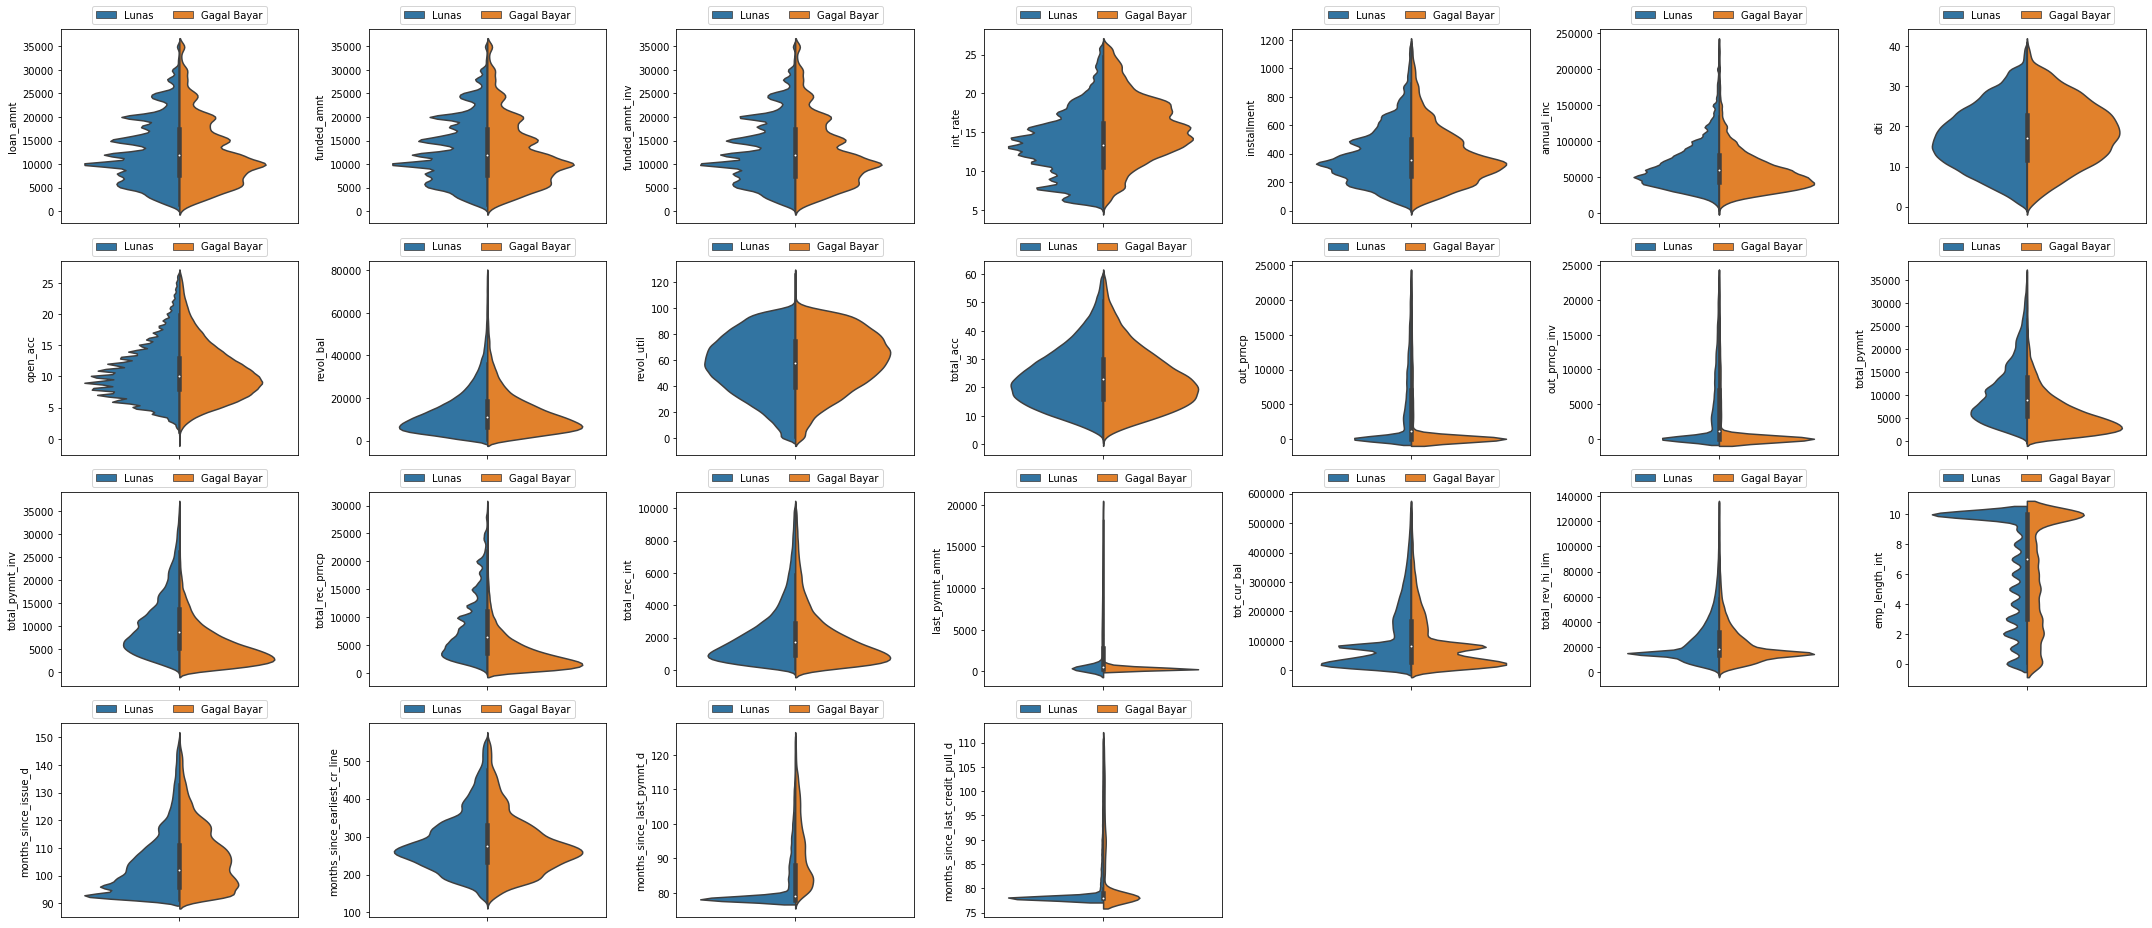

In [ ]:
numerik = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)
col = numerik.columns
df["all"] = ""

plt.figure(figsize=(30,13))
for i,j in enumerate(col):
  plt.subplot(4,7,i+1)
  sns.violinplot(x="all", y=j, hue="status", data=df, split=True)
  plt.xlabel("")
  plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
  plt.tight_layout()

df.drop('all', axis = 1, inplace = True)

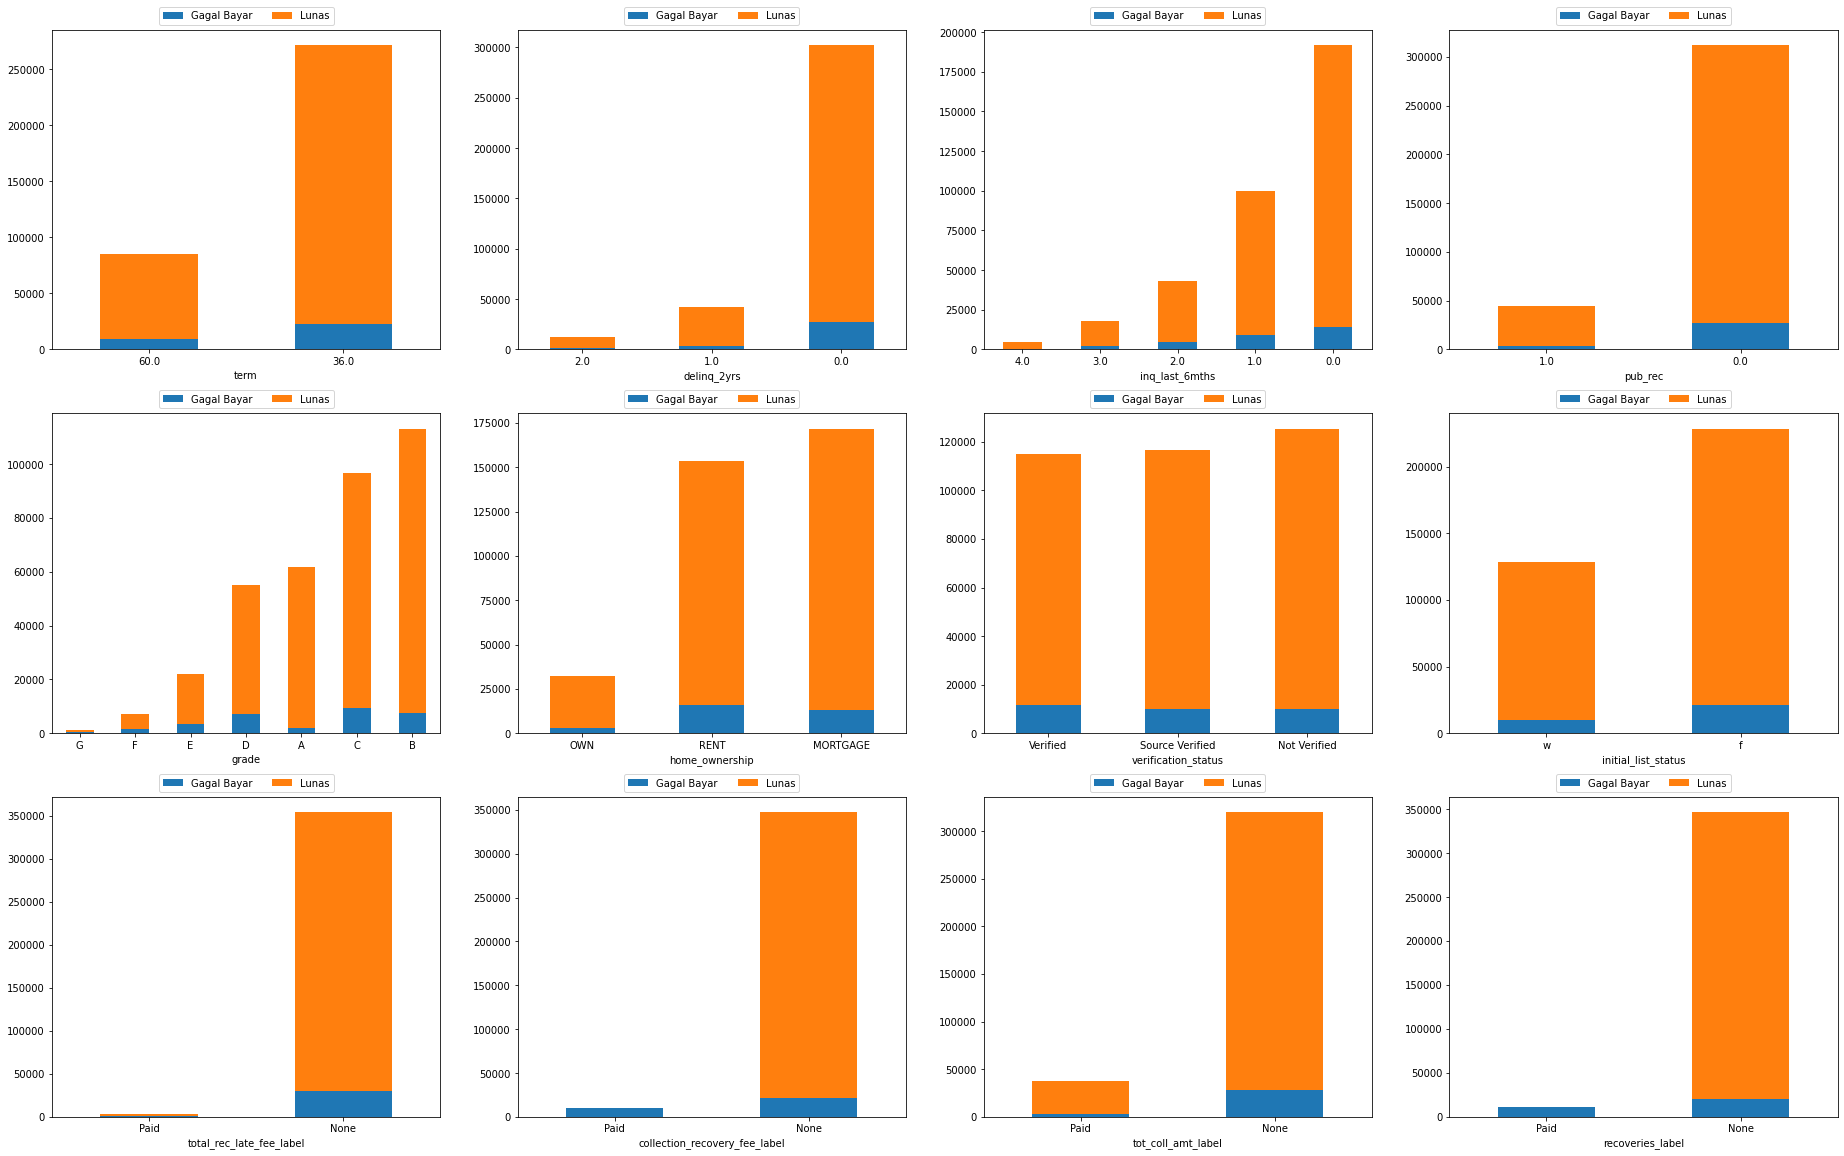

In [ ]:
kategorik = df.select_dtypes(include='object').drop(['status','purpose','addr_state'],axis=1)
col = kategorik.columns

fig = plt.figure(figsize=(32, 20))
for i,j in enumerate(col,start=1):
  ax = plt.subplot(3,4,i)
  pd.crosstab(df[j],df['status']).sort_values(by=['Lunas']).plot.bar(stacked=True,ax=ax)
  plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
  plt.xticks(rotation='0')

In [ ]:
df.drop('collection_recovery_fee_label', axis=1, inplace=True)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

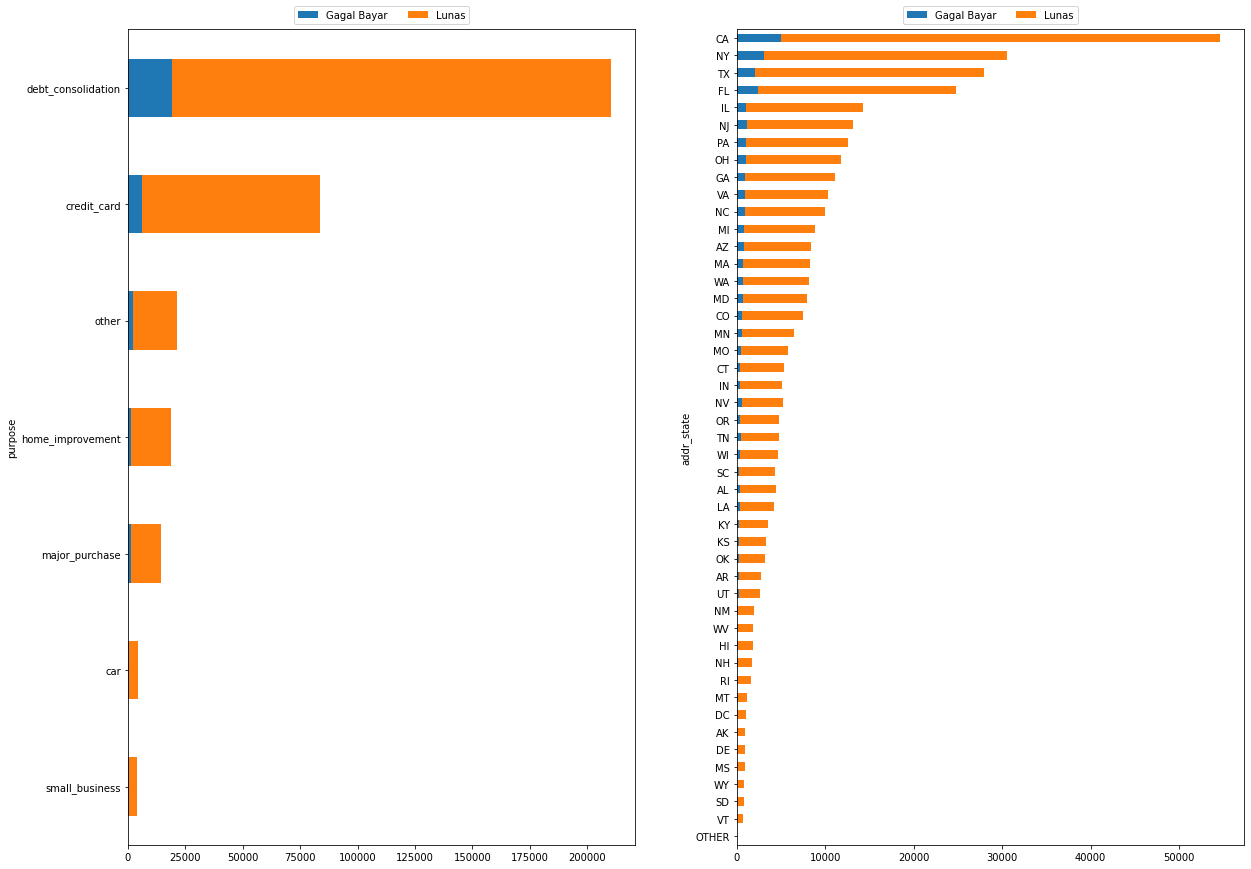

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(121)
pd.crosstab(df['purpose'], df['status']).sort_values(by=['Lunas']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
plt.xticks(rotation='0')

ax = plt.subplot(122)
pd.crosstab(df['addr_state'], df['status']).sort_values(by=['Lunas']).plot.barh(stacked=True,ax=ax)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), ncol=2)
plt.xticks(rotation='0')

### Bivariate

anova test

In [ ]:
x = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)
y = df['status']
col_num = x.columns

from sklearn.feature_selection import f_classif
fval,pval = f_classif(x,y)
for i,j in enumerate(col_num): 
  print('pvalue variabel {} = {}'.format(j,round(pval[i],3)))
     

pvalue variabel loan_amnt = 0.0
pvalue variabel funded_amnt = 0.0
pvalue variabel funded_amnt_inv = 0.0
pvalue variabel int_rate = 0.0
pvalue variabel installment = 0.0
pvalue variabel annual_inc = 0.0
pvalue variabel dti = 0.0
pvalue variabel open_acc = 0.021
pvalue variabel revol_bal = 0.0
pvalue variabel revol_util = 0.0
pvalue variabel total_acc = 0.0
pvalue variabel out_prncp = 0.0
pvalue variabel out_prncp_inv = 0.0
pvalue variabel total_pymnt = 0.0
pvalue variabel total_pymnt_inv = 0.0
pvalue variabel total_rec_prncp = 0.0
pvalue variabel total_rec_int = 0.0
pvalue variabel last_pymnt_amnt = 0.0
pvalue variabel tot_cur_bal = 0.0
pvalue variabel total_rev_hi_lim = 0.0
pvalue variabel emp_length_int = 0.0
pvalue variabel months_since_issue_d = 0.0
pvalue variabel months_since_earliest_cr_line = 0.0
pvalue variabel months_since_last_pymnt_d = 0.0
pvalue variabel months_since_last_credit_pull_d = 0.0


catatan: 

terdapat prediktor numerik signifikansi < 0.05 pada semua variable, maka H0 juga ditolak yang artinya ternyata terdapat perbedaan rata-rata antara label target yang diuji.

>dapat dikatakan bahwa terdapat pengaruh semua variabel prediktor numerik terhadap status kredit



chi-square test

In [ ]:
x = df.select_dtypes(include='object').drop('status',axis=1)
y = df['status']
col_kat = x.columns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for i in col_kat:
  x_cat = LabelEncoder().fit_transform(df[i]).reshape(-1,1)
  fval,pval = chi2(x_cat,y)
  print('pvalue variabel {} = {}'.format(i,pval))   

pvalue variabel term = [1.70539657e-82]
pvalue variabel delinq_2yrs = [0.00314459]
pvalue variabel inq_last_6mths = [4.91389461e-299]
pvalue variabel pub_rec = [0.06204416]
pvalue variabel grade = [0.]
pvalue variabel home_ownership = [4.70518872e-172]
pvalue variabel verification_status = [2.07096688e-59]
pvalue variabel purpose = [1.66919021e-58]
pvalue variabel addr_state = [3.17195947e-42]
pvalue variabel initial_list_status = [9.99677159e-44]
pvalue variabel total_rec_late_fee_label = [0.]
pvalue variabel tot_coll_amt_label = [0.0003353]
pvalue variabel recoveries_label = [0.]


In [ ]:
df.drop(['pub_rec'], axis=1, inplace=True)

catatan:

terdapat prediktor kategorik [kecuali: pub_rec] dengan signifikansi < 0.05 hampir pada semua variable, maka H0 ditolak yang artinya terdapat perbedaan rata-rata antara label target.

>dapat dikatakan bahwa terdapat pengaruh hampir semua variable prediktor kategorik terhadap status kredit.

### Multivariate

<ipython-input-58-be2cfc7971c9>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

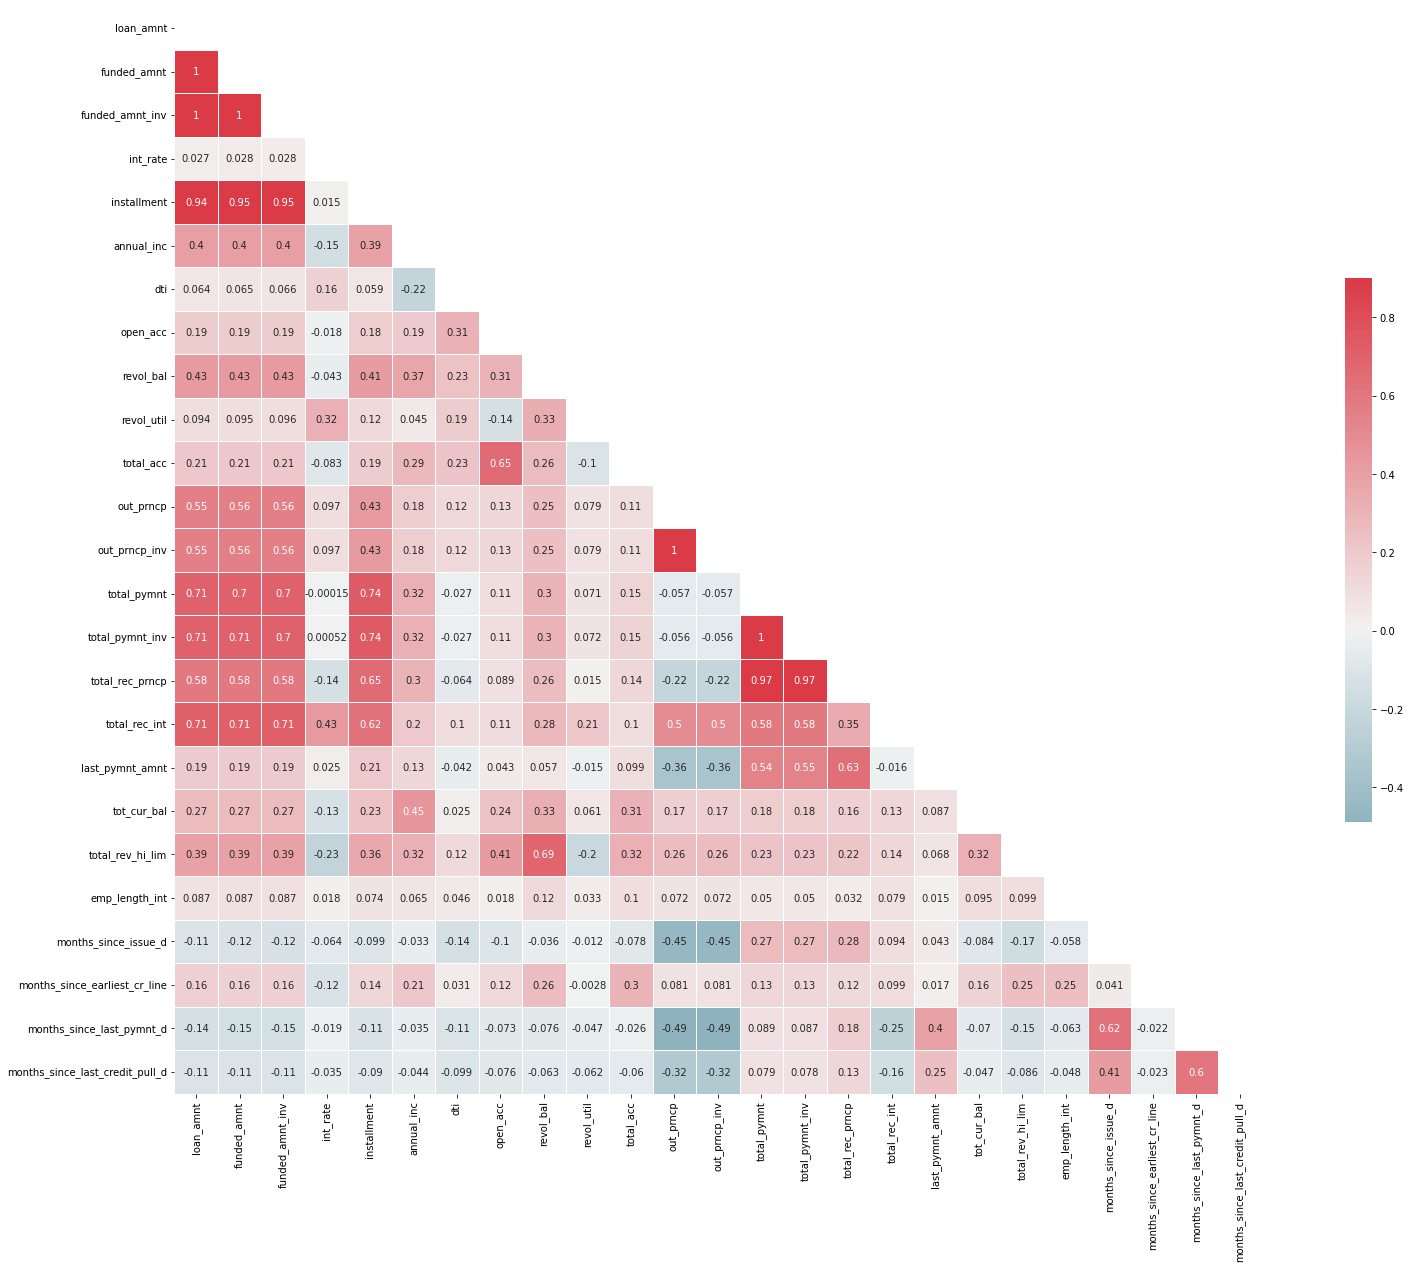

In [ ]:
data = df.select_dtypes(exclude='object').drop('bad_loan',axis=1)

corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

catatan:

* terdapat pasangan feature yang memiliki korelasi tinggi maka akan diambil salah satu saja. 
* berdasarkan [sumber](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html) kategori yang diamati adalah kategori dengan nilai diatas 0.4. nilai 0.4 - 0.6 menandakan kategori memiliki korelasi yang sedang, 0.6 - 0.8 menandakan korelasi yang cukup kuat, 0.8 - 1 menandakan korelasi yang sangat kuat. dalam kasus ini nilai korelasi yang digunakan adalah 0.7 keatas.

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.7)]
high_corr

<ipython-input-59-5a71f2435a9b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int']

In [ ]:
df.drop(high_corr, axis=1, inplace=True)

### Data Prepocessing

**Label Encoding**

In [ ]:
df['grade'] = df['grade'].astype('category').cat.codes

**One-Hot Encoding**

In [ ]:
cat = df.select_dtypes(include='object').drop('status',axis=1)
kategorik_col = cat.columns.tolist()

onehot = pd.get_dummies(df[kategorik_col], drop_first=True)
kategorik = pd.concat([onehot,df['grade']],axis=1)

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

numerik = df.select_dtypes(exclude='object')
dataset = pd.concat([numerik,kategorik],axis=1)

X = dataset.drop('bad_loan', axis = 1)
y = dataset['bad_loan']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Transformer**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

col_minmax = ['dti', 'open_acc', 'revol_util', 'total_acc', 'months_since_earliest_cr_line']
col_log = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_bal', 'out_prncp', 'last_pymnt_amnt',
           'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int', 'months_since_issue_d',
           'months_since_last_pymnt_d', 'months_since_last_credit_pull_d']

#MinMax Transformation
minmaxSC = MinMaxScaler()
X_train.loc[:, col_minmax] = minmaxSC.fit_transform(X_train.loc[:, col_minmax])
X_test.loc[:, col_minmax] = minmaxSC.transform(X_test.loc[:, col_minmax])

#Log Transformation
X_train.loc[:, col_log] = np.log1p(X_train.loc[:, col_log])
X_test.loc[:, col_log] = np.log1p(X_test.loc[:, col_log])

**Balancing target label**

In [ ]:
y_train.value_counts()

0    228130
1     21894
Name: bad_loan, dtype: int64

berdasarkan jumlah data diatas akan dilakukan undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=0)

X_resampled, y_resampled = under_sampler.fit_resample(X_train.values, y_train.ravel())
Counter(y_resampled)

Counter({0: 228130, 1: 228130})

In [ ]:
# return bentuk array ke dataframe

col = X_train.columns.to_list()

X_train = pd.DataFrame(X_resampled, 
             columns=col)

y_train = pd.Series(y_resampled)

### Modelling

Komparasi Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)
y_pred_rf = RFclassifier.predict(X_train)
y_pred_rf_test = RFclassifier.predict(X_test)

LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)
y_pred_lr = LRclassifier.predict(X_train)
y_pred_lr_test = LRclassifier.predict(X_test)

XTclassifier = ExtraTreesClassifier()
XTclassifier.fit(X_train, y_train)
y_pred_xt = XTclassifier.predict(X_train)
y_pred_xt_test = XTclassifier.predict(X_test)

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_train)
y_pred_dt_test = DTclassifier.predict(X_test)

GBclassifier = GradientBoostingClassifier()
GBclassifier.fit(X_train, y_train)
y_pred_gb = GBclassifier.predict(X_train)
y_pred_gb_test = GBclassifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

algorithm = ['RandomForest','LogisticRegression','Xtree','DecisionTree','GradientBoost']
pred_train = [y_pred_rf, y_pred_lr, y_pred_xt, y_pred_dt, y_pred_gb]
pred_test = [y_pred_rf_test, y_pred_lr_test, y_pred_xt_test, y_pred_dt_test, y_pred_gb_test]

train_set_accuracy = []
test_set_accuracy = []

for i in pred_train:
  train_set_accuracy.append(accuracy_score(y_train, i))

for i in pred_test:
  test_set_accuracy.append(accuracy_score(y_test, i))

n = list(zip(algorithm, train_set_accuracy, test_set_accuracy))
pd.DataFrame(n, columns = ['Model','Akurasi Train', 'Akurasi Test']).sort_values(['Akurasi Train'],ascending=False)

,Model,Akurasi Train,Akurasi Test
0,RandomForest,1.000000,0.988820
2,Xtree,1.000000,0.977248
3,DecisionTree,1.000000,0.984350
4,GradientBoost,0.972204,0.975139
1,LogisticRegression,0.888233,0.926862


catatan:

RandomForest merupakan algorithm terbaik, sehingga akan dipilih untuk permodelan lebih lanjut

<AxesSubplot:title={'center':'Feature Importance of Random Forest Model'}>

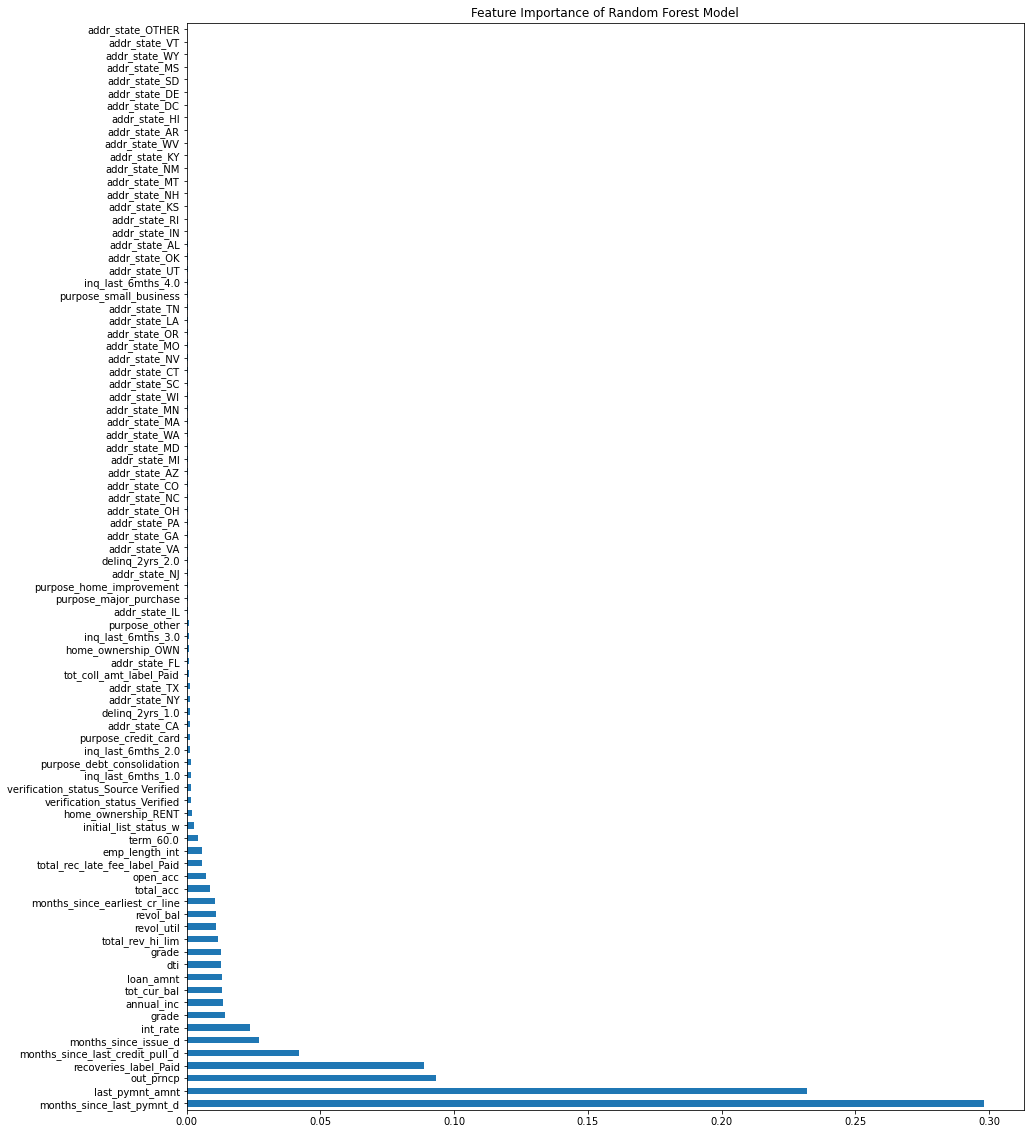

In [ ]:
feature_importance = pd.Series(RFclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15,20))
feature_importance.plot(kind='barh', title='Feature Importance of Random Forest Model')

**select variable**

In [ ]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'last_pymnt_amnt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int',
       'months_since_issue_d', 'months_since_earliest_cr_line',
       'months_since_last_pymnt_d', 'months_since_last_credit_pull_d', 'grade',
       'term_60.0', 'delinq_2yrs_1.0', 'delinq_2yrs_2.0', 'inq_last_6mths_1.0',
       'inq_last_6mths_2.0', 'inq_last_6mths_3.0', 'inq_last_6mths_4.0',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other',
       'purpose_small_business', 'addr_state_AL', 'addr_state_AR',
       'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT',
       'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA',
       'addr_s

In [ ]:
col = ['months_since_last_pymnt_d','last_pymnt_amnt','recoveries_label_Paid','out_prncp','months_since_last_credit_pull_d','months_since_issue_d',
       'int_rate','annual_inc','loan_amnt','grade','tot_cur_bal','dti','total_rev_hi_lim','revol_bal','revol_util','months_since_earliest_cr_line',
       'total_acc','open_acc','emp_length_int','total_rec_late_fee_label_Paid','term_60.0','initial_list_status_w','home_ownership_RENT']

In [ ]:
# mengecek overfitting

X_train2 = X_train[col]
X_test2 = X_test[col]

RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train2, y_train)
y_pred_rf = RFclassifier.predict(X_train2)
y_pred_rf_test = RFclassifier.predict(X_test2)

print('Akurasi Train',accuracy_score(y_train, y_pred_rf))
print('Akurasi Test',accuracy_score(y_test, y_pred_rf_test))

Akurasi Train 1.0
Akurasi Test 0.9899490452992888


model tidak terkena overfitting / underfitting

###Model Evaluation

confusion matrix


True Positives(TP) =  97217
True Negatives(TN) =  8860
False Positives(FP) =  408
False Negatives(FN) =  669




<AxesSubplot:>

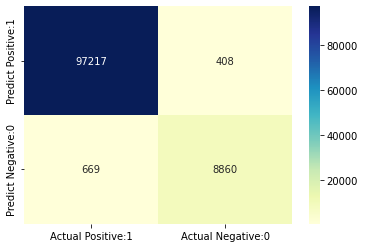

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_test)

print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('\n')

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

In [ ]:
# cek akurasi, presisi, dan sensitifitas

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitifitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.9899

Kesalahan Klasifikasi : 0.0101

Presisi : 0.9958

Sensitifitas : 0.9932


In [ ]:
# cek roc-auc

from sklearn.metrics import roc_curve, precision_recall_curve,auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9628070026547441


Text(0.5, 0, 'False Positive Rate')

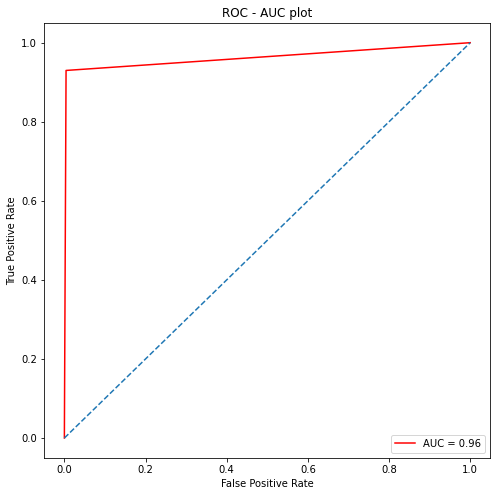

In [ ]:
plt.figure(figsize=(8,8))

plt.title('ROC - AUC plot')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

berdasarkan grafik diatas, nilai 0.9 - 1 menunjukan diskriminasi yang sangat baik